# Imputation Research Project <img src="https://i.pinimg.com/564x/f5/8a/61/f58a61cf2d06682e309489166b5fb8fb.jpg" alt="Alt text image not displaying" width="300" style="float: right;"/>
## Notebook 1.1: Exploratory Data Analysis

**Author:** Chike Odenigbo

**Date:** November 22nd, 2022

**Notebook Structure:**

* 1.0 Preprocessing

* **1.1 Exploratory Data Analysis**

* 1.2 Masking

* 2.* Models


### Step 1: Import Requirements 


In [2]:
import pandas as pd
from scipy.stats import variation
from src.preprocessing.preprocessing import NumericalVariableCleaner, NumericalMasker # utility preprocessing packages found in src folder
import os
from pathlib import Path
from notebook_config import ROOT_DIR # setup.py file changed the root of the project so it is set in the config file
ROOT_DIR = ROOT_DIR.as_posix() # convert root path to windows readable path (i.e. change backslash to forward slash)
import json
import numpy as np

In [3]:
nutrition_df = pd.read_csv(f'{ROOT_DIR}/data/interim/nutrition_numerical.csv')
nutrition_df

,name,serving_size,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Cornstarch,100,0.1,NaN,0,9.0,0.4,0.0,0.0,0.000,...,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
1,"Nuts, pecans",100,72.0,6.2,0,0.0,40.5,22.0,0.0,1.167,...,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
2,"Eggplant, raw",100,0.2,NaN,0,2.0,6.9,22.0,0.0,0.649,...,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
3,"Teff, uncooked",100,2.4,0.4,0,12.0,13.1,0.0,0.0,3.363,...,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
4,"Sherbet, orange",100,2.0,1.2,1,46.0,7.7,4.0,0.0,0.063,...,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100,3.5,1.4,62,54.0,64.5,4.0,0.0,6.422,...,3.50,1.353,1.554,0.244,62.0,0.0,1.11,0.0,0.0,72.51
8785,"Lamb, cooked, separable lean only, composite o...",100,8.9,3.9,109,50.0,0.0,0.0,0.0,7.680,...,8.86,3.860,3.480,0.520,109.0,0.0,1.60,0.0,0.0,59.95
8786,"Lamb, raw, separable lean and fat, composite o...",100,23.0,12.0,78,39.0,0.0,1.0,0.0,6.550,...,22.74,11.570,8.720,0.980,78.0,0.0,0.92,0.0,0.0,59.80
8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100,3.0,1.1,60,53.0,64.2,4.0,0.0,6.720,...,3.04,1.086,1.266,0.233,60.0,0.0,1.10,0.0,0.0,73.43


In [106]:
nutrition_df['name_list'] = nutrition_df.name.str.lower().str.split(',')
nutrition_df

,name,serving_size,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water,name_list
0,Cornstarch,100,0.1,NaN,0,9.0,0.4,0.0,0.0,0.000,...,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32,[cornstarch]
1,"Nuts, pecans",100,72.0,6.2,0,0.0,40.5,22.0,0.0,1.167,...,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52,"[nuts, pecans]"
2,"Eggplant, raw",100,0.2,NaN,0,2.0,6.9,22.0,0.0,0.649,...,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30,"[eggplant, raw]"
3,"Teff, uncooked",100,2.4,0.4,0,12.0,13.1,0.0,0.0,3.363,...,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82,"[teff, uncooked]"
4,"Sherbet, orange",100,2.0,1.2,1,46.0,7.7,4.0,0.0,0.063,...,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10,"[sherbet, orange]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100,3.5,1.4,62,54.0,64.5,4.0,0.0,6.422,...,1.353,1.554,0.244,62.0,0.0,1.11,0.0,0.0,72.51,"[beef, raw, all grades, trimmed to 0"" fat, ..."
8785,"Lamb, cooked, separable lean only, composite o...",100,8.9,3.9,109,50.0,0.0,0.0,0.0,7.680,...,3.860,3.480,0.520,109.0,0.0,1.60,0.0,0.0,59.95,"[lamb, cooked, separable lean only, composi..."
8786,"Lamb, raw, separable lean and fat, composite o...",100,23.0,12.0,78,39.0,0.0,1.0,0.0,6.550,...,11.570,8.720,0.980,78.0,0.0,0.92,0.0,0.0,59.80,"[lamb, raw, separable lean and fat, composi..."
8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100,3.0,1.1,60,53.0,64.2,4.0,0.0,6.720,...,1.086,1.266,0.233,60.0,0.0,1.10,0.0,0.0,73.43,"[beef, raw, all grades, trimmed to 0"" fat, ..."


In [109]:
from itertools import chain, combinations

#https://stackoverflow.com/a/5898031
#only converted to list and removed empty tuples by range(1,...
def all_subsets(ss):
    return list(chain(*map(lambda x: combinations(ss, x), range(1, len(ss)+1))))

s = nutrition_df['name_list'].apply(all_subsets).explode().value_counts()
s.reset_index().head(20)

,index,name_list
0,"( cooked,)",1730
1,"( raw,)",1337
2,"(beef,)",961
3,"( separable lean and fat,)",770
4,"( separable lean only,)",661
5,"(beef, cooked)",544
6,"( canned,)",502
7,"( boneless,)",489
8,"( trimmed to 0"" fat,)",467
9,"(beef, separable lean and fat)",462


In [118]:
nutrition_df["name_short"] = nutrition_df["name_list"].str[0]
nutrition_df["name_short"].value_counts().reset_index(name = 'Number_of_Observations').head(20)

,index,Number of Observations
0,beef,961
1,pork,324
2,lamb,295
3,beverages,282
4,cereals ready-to-eat,258
5,babyfood,243
6,fish,231
7,chicken,204
8,soup,176
9,snacks,145


In [113]:
nutrition_df

,name,serving_size,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,...,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water,name_list,name_short
0,Cornstarch,100,0.1,NaN,0,9.0,0.4,0.0,0.0,0.000,...,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32,[cornstarch],cornstarch
1,"Nuts, pecans",100,72.0,6.2,0,0.0,40.5,22.0,0.0,1.167,...,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52,"[nuts, pecans]",nuts
2,"Eggplant, raw",100,0.2,NaN,0,2.0,6.9,22.0,0.0,0.649,...,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30,"[eggplant, raw]",eggplant
3,"Teff, uncooked",100,2.4,0.4,0,12.0,13.1,0.0,0.0,3.363,...,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82,"[teff, uncooked]",teff
4,"Sherbet, orange",100,2.0,1.2,1,46.0,7.7,4.0,0.0,0.063,...,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10,"[sherbet, orange]",sherbet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100,3.5,1.4,62,54.0,64.5,4.0,0.0,6.422,...,1.554,0.244,62.0,0.0,1.11,0.0,0.0,72.51,"[beef, raw, all grades, trimmed to 0"" fat, ...",beef
8785,"Lamb, cooked, separable lean only, composite o...",100,8.9,3.9,109,50.0,0.0,0.0,0.0,7.680,...,3.480,0.520,109.0,0.0,1.60,0.0,0.0,59.95,"[lamb, cooked, separable lean only, composi...",lamb
8786,"Lamb, raw, separable lean and fat, composite o...",100,23.0,12.0,78,39.0,0.0,1.0,0.0,6.550,...,8.720,0.980,78.0,0.0,0.92,0.0,0.0,59.80,"[lamb, raw, separable lean and fat, composi...",lamb
8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100,3.0,1.1,60,53.0,64.2,4.0,0.0,6.720,...,1.266,0.233,60.0,0.0,1.10,0.0,0.0,73.43,"[beef, raw, all grades, trimmed to 0"" fat, ...",beef


In [11]:
cv_list = np.std(nutrition_df, axis=0, ddof=1)/np.mean(nutrition_df, axis=0)
cv_df = cv_list.rename_axis('nutrient').reset_index(name='variation_coefficient').sort_values('variation_coefficient',ascending = False)
cv_df.head(10)

,nutrient,variation_coefficient
70,caffeine,31.458645
16,cryptoxanthin_beta,18.482390
58,galactose,16.214746
60,lactose,13.917778
68,alcohol,13.615567
71,theobromine,12.982805
14,carotene_alpha,12.871048
29,manganese,12.708819
21,vitamin_d,8.491550
13,vitamin_a_rae,8.365677


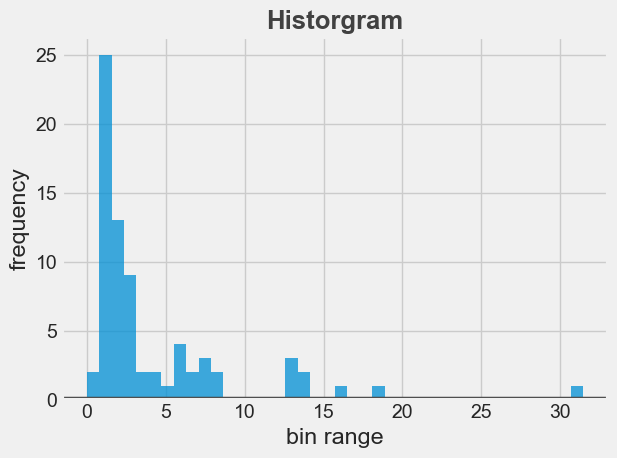

In [75]:
import seaborn as sns
from matplotlib import pyplot as plt
# plt.style.use('seaborn-white')
fig, ax = plt.subplots()
# fig.suptitle('Sharing both axes')
plt.style.use("fivethirtyeight")
# g = sns.displot(cv_df, x="variation_coefficient")
ax.hist(cv_df["variation_coefficient"], 40,alpha=0.75)
# g.map(plt.axhline, y=0.2, ls='-',c='#414141', linewidth=1.5, alpha=1)
# g.map(plt.text,x=1996.7, y=118, s="Who Got to Be On 'The Daily Show'?", fontsize=18.5, fontweight='semibold', color='#414141')

# Subtitle text
# g.map(plt.text,x=1996.7, y=112, s='Occupation of guests, by year', fontsize=16.5, color='#414141')
#fax.suptitle('test')
ax.set_title('Historgram',fontsize=18.5, fontweight='semibold', color='#414141')
ax.set_xlabel('bin range')
ax.set_ylabel('frequency')
ax.axhline(y=0.1, color='#414141', linewidth=2.5)
# ax.set_text('test')


fig.tight_layout()
plt.show()

# ax.text(x=1996.7, y=118, s="Who Got to Be On 'The Daily Show'?", fontsize=18.5, fontweight='semibold', color='#414141')

# # # Subtitle text
# ax.text(x=1996.7, y=112, s='Occupation of guests, by year', fontsize=16.5, color='#414141')



AttributeError: 'FacetGrid' object has no attribute 'set_xlabel'

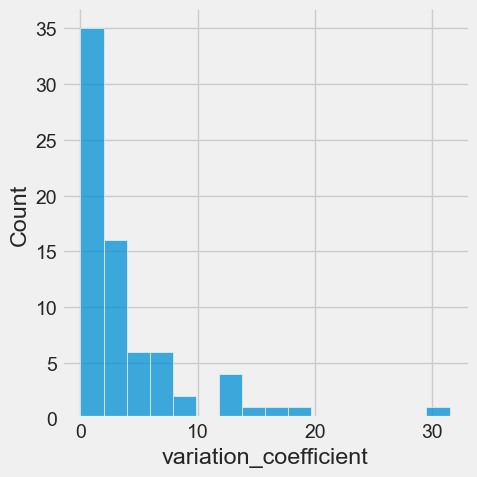

In [54]:
b = sns.displot(cv_df, x="variation_coefficient",ax=ax,alpha=0.75)
# b.set_title("Title",fontsize=50)
b.set_xlabel("X Label",fontsize=30)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=5)
plt.show()

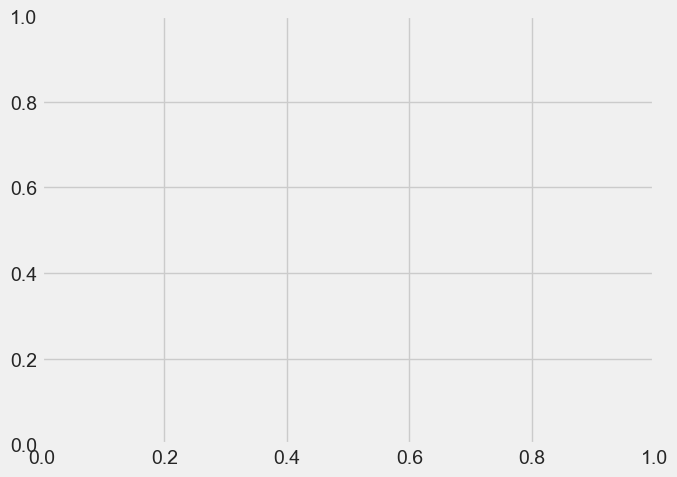

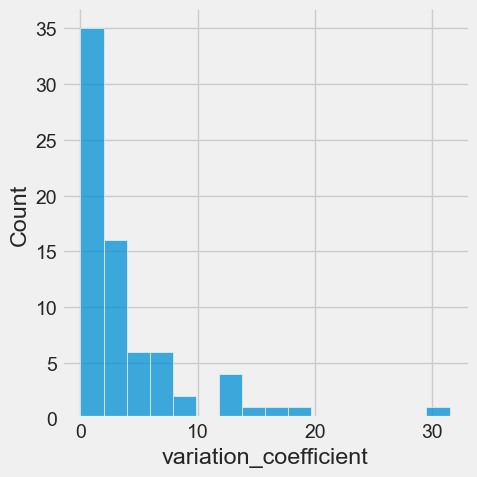

In [51]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(7,5))
sns.displot(cv_df, x="variation_coefficient",ax=ax,alpha=0.75)
fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Variability Analysis')

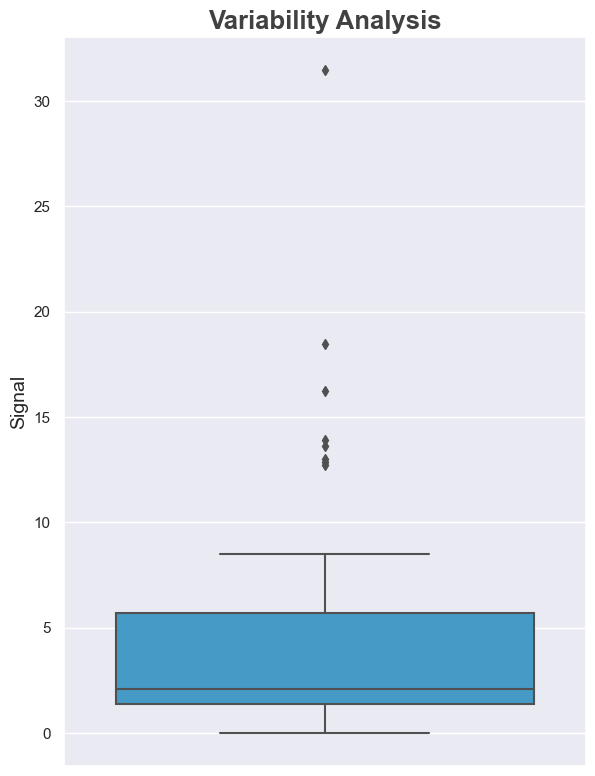

In [103]:
plt.style.use("fivethirtyeight")
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]
sns.set(
        #style="dark",                   # The 'ticks' style
       rc={"figure.figsize": (6,9)})
sns.set_palette(five_thirty_eight)
b = sns.boxplot(y=cv_df["variation_coefficient"])
b.set_ylabel("Signal", fontsize = 14)
# Set the x axis label and font size
# b.set_xlabel("Region", fontsize = 14)
# Set the plot title with the pval variable and font size
b.set_title('Variability Analysis',fontsize=18.5, fontweight='semibold', color='#414141')

<AxesSubplot: ylabel='variation_coefficient'>

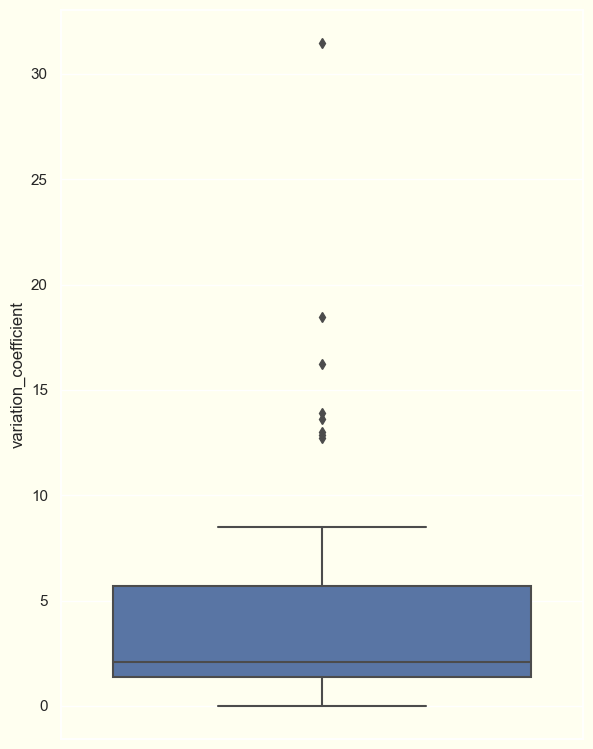

In [87]:
plt.style.use("fivethirtyeight")
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]

sns.set_palette(five_thirty_eight)
sns.set(
        #style="dark",                   # The 'ticks' style
        rc={"figure.figsize": (6, 9),      # width = 6, height = 9
            "figure.facecolor": "ivory",  # Figure colour
            "axes.facecolor": "ivory"})  # Axes colour
sns.boxplot(y=cv_df["variation_coefficient"])

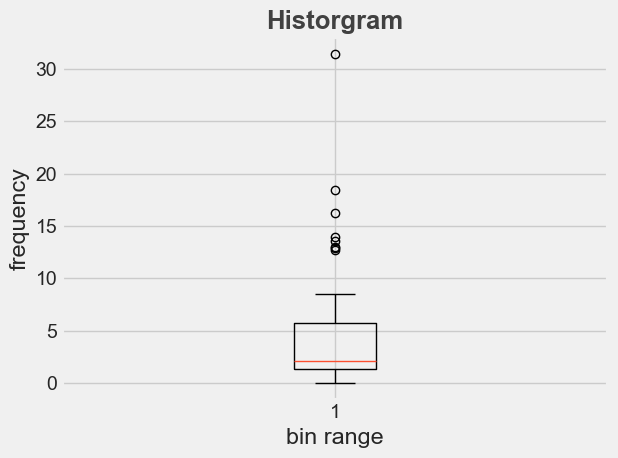

In [78]:
fig, ax = plt.subplots()
ax.boxplot(cv_df["variation_coefficient"])
ax.set_title('Historgram',fontsize=18.5, fontweight='semibold', color='#414141')
ax.set_xlabel('bin range')
ax.set_ylabel('frequency')
# ax.axhline(y=0.1, color='#414141', linewidth=2.5)
# ax.set_text('test')


fig.tight_layout()
plt.show()

In [14]:
missing_df = (nutrition_df.isnull().mean() * 100).rename_axis('nutrient').reset_index(name='missing_rate').sort_values('missing_rate',ascending=False)
missing_df.head(10)

,nutrient,missing_rate
3,saturated_fat,18.090795
0,name,0.000000
47,methionine,0.000000
54,valine,0.000000
53,tyrosine,0.000000
52,tryptophan,0.000000
51,threonine,0.000000
50,serine,0.000000
49,proline,0.000000
48,phenylalanine,0.000000


### Step 2: Clean Data

In [19]:
Q1 = nutrition_df.quantile(0.25)
Q3 = nutrition_df.quantile(0.75)
IQR = Q3 - Q1
(((nutrition_df < (Q1 - 1.5 * IQR)) | (nutrition_df > (Q3 + 1.5 * IQR))).sum()).rename_axis('nutrient').reset_index(name='outlier_count').sort_values('outlier_count',ascending = False)

,nutrient,outlier_count
31,lutein_zeaxanthin,2186
69,vitamin_d,1938
9,carotene_beta,1862
68,vitamin_c,1631
65,vitamin_a_rae,1422
...,...,...
36,methionine,16
32,lysine,15
52,serving_size,0
38,name,0


In [ ]:
zero_counts_df = pd.DataFrame({'nutrient':nutrition_df.columns,
              'zero_value_counts':np.count_nonzero(nutrition_df.fillna(1)==0,axis=0)}).sort_values('zero_value_counts',ascending = False)
zero_counts_df['z_score_zero_value_counts'] = (zero_counts_df['zero_value_counts'] - zero_counts_df['zero_value_counts'].mean())/zero_counts_df['zero_value_counts'].std(ddof=1)
zero_counts_df.head(20)

In [ ]:
non_zero_counts_df = pd.DataFrame({'nutrient':nutrition_df.columns,
              'non_zero_value_counts':np.count_nonzero(nutrition_df,axis=0)}).sort_values('non_zero_value_counts',ascending = False)
non_zero_counts_df.head(10)

In [ ]:
np.count_nonzero(nutrition_df,axis=0)

In [ ]:
cleaner = NumericalVariableCleaner()
nutrition_clean_df = cleaner.clean(nutrition_df,col_ignore = ['name'])

In [ ]:
cleaner._measure_units

In [ ]:
nutrition_clean_df

### Step 3: Output Data 

In [ ]:
nutrition_clean_df.to_csv(f'{ROOT_DIR}/data/interim/nutrition_numerical.csv', index=False)

In [ ]:
with open(f'{ROOT_DIR}/references/nutrient_measure_units.json', 'w') as fp:
    json.dump(cleaner._measure_units, fp)